# Ising Simulation

## Introduction
Ising model is a model used to describe a spin system, in which spins can interacted with each other. A typical ising model is a lattice spins. Those spins on square lattice can only interacted with their nearest neighbors and attempt to align with each other.
To formulate this system, we can write down the energy of the system, which is consisted of two parts, the first part is internal energy, the other is due to the applied field

\begin{equation}
E_{\{s_i\}}=E_{in}+E_{out}=\sum_{ij}J_{ij}s_is_j-H\sum_{i=1}^{N}s_i
\end{equation}

where ${\{s_i\}}=\{s_1,s_2,\dots,s_N\}$ represent a configuration of the system. J is the coupling constant, which shows how spins interact with each other.In the simplest case, we only consider the nearest neighbor coupling, which meas spins only interacted with their nearest neighbors.
\begin{equation}
	J_{ij}=
	\begin{cases}
		-1\quad \text{if $i$ and $j$ are nearest neighbors}\\
		0\quad \text{others}
	\end{cases}
\end{equation}
For difference spatial construct, the nearest neighbor have different definition. 
For difference spatial construct, the nearest neighbor have different definition.  
\subsection{Partition function}
In statistical physics, the partition function contains all statistical information of a system in thermodynamic equilibrium.
The partition function is defined as
\begin{equation}
\begin{split}
    Z&=\sum_{\{s_i\}}\exp{-\beta E_{\{s_i\}}}\\
    &=\sum_{\{s_i\}}\exp{(-\sum_{ij}J_{ij}s_is_j-H\sum_{i=1}^{N}s_i)}
\end{split}
\end{equation}

and let $p_{\{s_i\}}$ denote the probability of the system being in a particular state ${\{s_i\}}$, which is
\begin{equation}
p_{\{s_i\}}=\frac{\exp{-\beta E_{\{s_i\}}}}{Z}
\end{equation}
Then the esemble average of any observable $A$ can be expressed as
\begin{equation}
    \begin{split}
        \langle A\rangle=A_{\{s_i\}} p_{\{s_i\}}
    \end{split}
\end{equation}

### Quantity of interest
#### Magnetization
In intuition, total magnetization is a important quantity of a spin system. It is just the direct summation of the total spins. While, to make it more comparable for systems of different sizes, we use magnetization per spin instead. Which is defined as
\begin{equation}
M=\frac{1}{N}\sum_is_i
\end{equation}
for a statistical system, we care more about its average value, which can be derived from partition function function. 
\begin{equation}
\end{equation}
#### Correlation length
In high temperature, the spins point up and down randomly. While in low temperature, all spines tend to align to each other. To quantify this, we can define a quantity named correlation length $\xi$, which can be defined mathematically through correlation function $g(i,j)$
\begin{equation}
g(i,j)=\langle s_i-\langle s_i\rangle\rangle \langle s_j-\langle s_j\rangle\rangle
\end{equation}
which measured the largest cluster of aligned spins.

In [1]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

## Exact calculation

For a finite system, in principle, we can list all possible configurations. So that we can calculate all thermal quantities of this system, i.e. the analytical solution of the system. While, for large system, the time computational complexity is $O(2^n)$. Hence, this algorithm is not suitable for large systems.

For $4\times 4$ spin system, the number of all possible configurations is $N=2^{16}=65536$, which is still not a large number so that we can use enumeration algorithm to calculate it.


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
from matplotlib.legend_handler import HandlerLine2D


In [3]:
#decide which spin to flip
def gray_flip(t, N):
    k = t[0]
    if k > N: return t, k
    t[k - 1] = t[k]
    t[k] = k + 1
    if k != 1: t[0] = 1
    return t, k#k is the index of spin, t is 


def ising(T,L):
    T=list(T)
    M_ave=[]
    E2_ave=[]
    Cv=[]
    E_ave=[]
    chi=[]
    for t in list(T):
        N = L * L
        nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
                    (i // L) * L + (i - 1) % L, (i - L) % N)
                                            for i in list(range(N))} 
        #find nearst neighbors
        beta=1/t
        S = [-1] * N#configuration of spins
        E = -2 * N#total energy
        En=[E]
        p=[np.exp(-beta*E)]
        M=[np.sum(S)/N]#average spin
        tau = list(range(1, N + 2))  
        for i in list(range(1, 2 ** N)):
            tau, k = gray_flip(tau, N)
            h = sum(S[n] for n in nbr[k - 1])#nearst neighbor of kth spin
            E += 2 * h * S[k - 1] #energy
            S[k - 1] *= -1#flip the spin
            p.append(np.exp(-beta*E))
            M.append(sum(S)/N)
            En.append(E)   
        Z=np.sum(p)
        M_temp = np.dot(np.abs(M),p)/Z
        M2_temp = np.dot(np.power(M,2),p)/Z
        M_ave.append(M_temp)
        chi.append((M2_temp-M_temp**2)*beta**2)
        E_temp = np.dot(En,p)/Z/N
        E2_temp = np.dot(np.power(En,2),p)/Z/N**2
        Cv.append((E2_temp-E_temp**2)*beta**2)
        E_ave.append(E_temp)
        #print(M_ave,E_ave)
    return M_ave,chi,E_ave,Cv

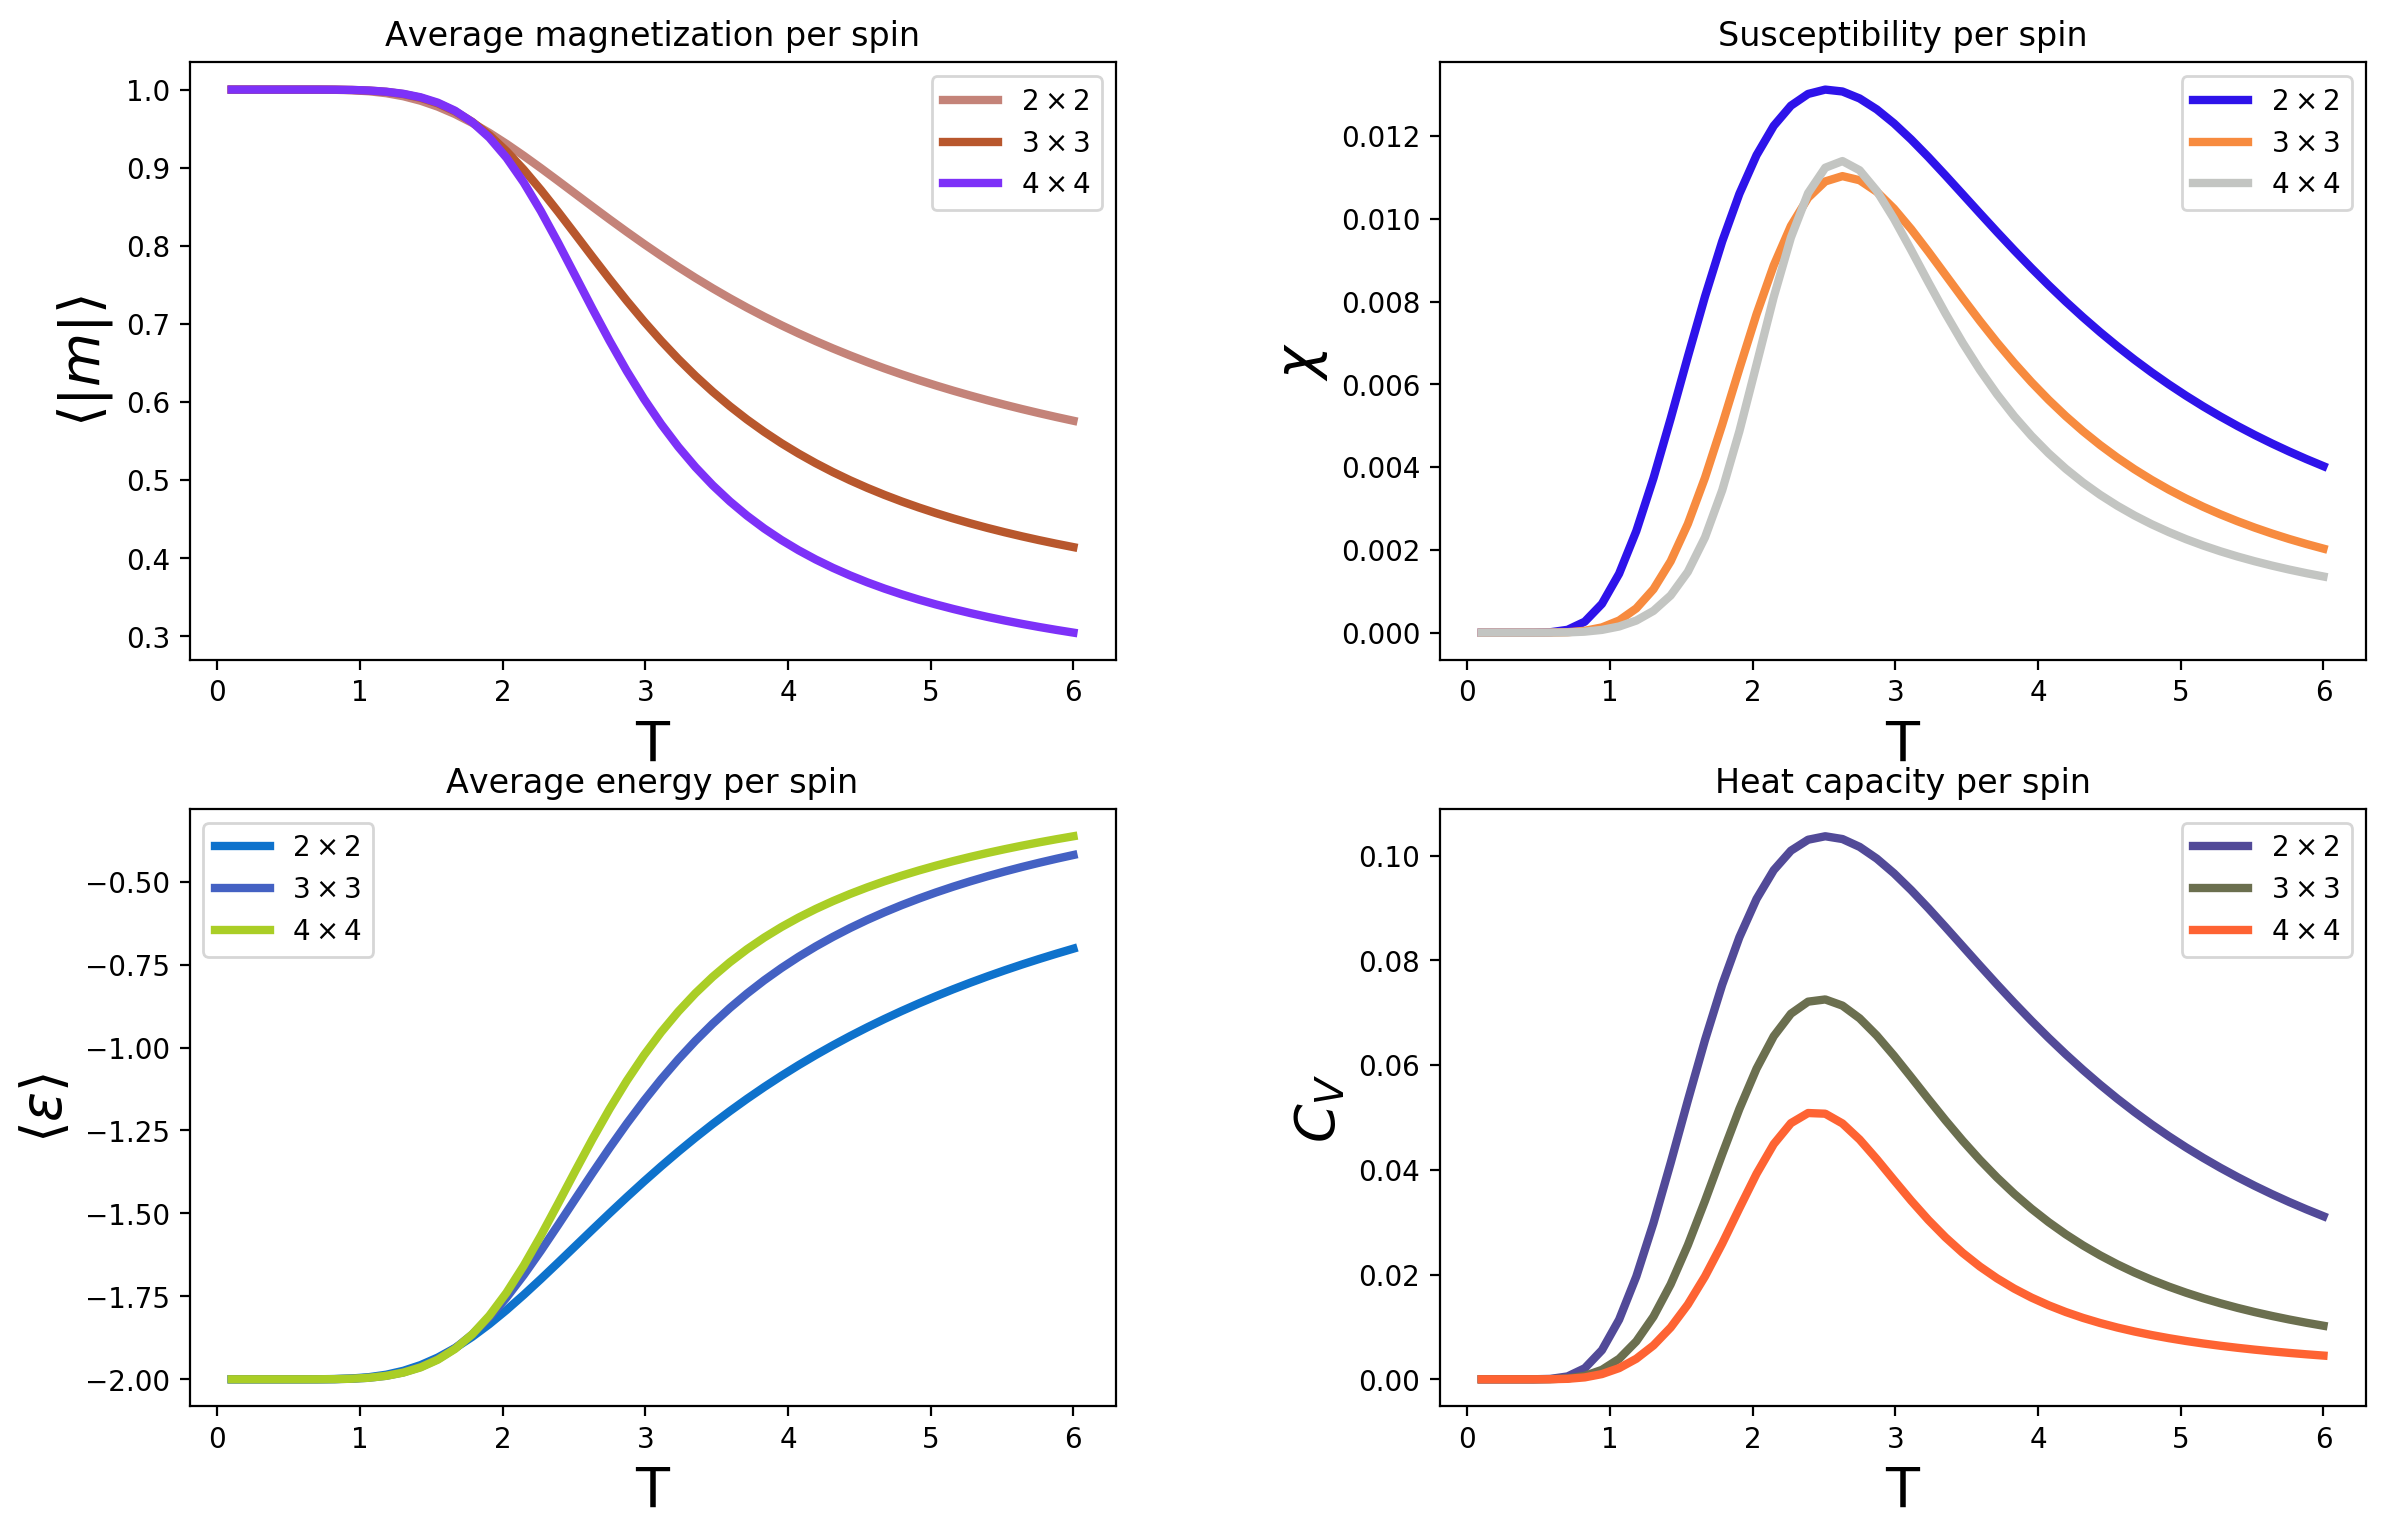

In [205]:
list_T=list(np.linspace( 0.1,6,50))

#for m in list([2,3,4]):   
  #  pylab.plot(list_T,  list_Cv, 'k-', lw=3,color=np.random.rand(3,1),label="$%i\\times%i$"%(m,m))
#plt.legend()
#pylab.ylabel(r'$C_V$', fontsize=20)
list_M=[]
list_chi=[]
list_E=[]
list_Cv=[]

plt.figure(1,figsize=(12.8,8), dpi=200)
for m in list([2,3,4]):
    M_temp,chi_temp,E_temp,Cv_temp=ising(list_T,m)
    list_M.append(M_temp)
    list_chi.append(chi_temp)
    list_E.append(E_temp)
    list_Cv.append(Cv_temp)

num=[0,1,2]
Fontsize=20
plt.subplot(221)
[plt.plot(list_T, list_M[m], 'k-', lw=3,color=np.random.rand(3,1),label="$%i\\times%i$"%(m+2,m+2)) for m in num]
plt.xlabel('T', fontsize=Fontsize)
plt.ylabel(r'$\langle |m|\rangle$', fontsize=Fontsize)
plt.title('Average magnetization per spin')
plt.legend()

plt.subplot(222)
[plt.plot(list_T, list_chi[m], 'k-', lw=3,color=np.random.rand(3,1),label="$%i\\times%i$"%(m+2,m+2)) for m in num]
plt.xlabel('T', fontsize=Fontsize)
plt.ylabel(r'$\chi$', fontsize=Fontsize)
plt.title('Susceptibility per spin')
plt.legend()

plt.subplot(223)
[plt.plot(list_T, list_E[m], 'k-', lw=3,color=np.random.rand(3,1),label="$%i\\times%i$"%(m+2,m+2)) for m in num]
plt.xlabel('T', fontsize=Fontsize)
plt.ylabel(r'$\langle \varepsilon\rangle$', fontsize=Fontsize)
plt.title('Average energy per spin')
plt.legend()

plt.subplot(224)
[plt.plot(list_T, list_Cv[m], 'k-', lw=3,color=np.random.rand(3,1),label="$%i\\times%i$"%(m+2,m+2)) for m in num]
plt.xlabel('T', fontsize=Fontsize)
plt.ylabel(r'$ C_V$', fontsize=Fontsize)
plt.title('Heat capacity per spin')
plt.legend()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

## Metropoli Algorithm


In [210]:
# Apply Metropoli Algorithm to Ising system
#import enumeration as enum
import math,random
def ising_metropolis(T,L,flip,S=None,H=None):
    N = L*L
    H = 0. if H==None else H
    if S is None:
        S = [np.random.choice([1, -1]) for k in list(range(N))] #initialize spin configuration
    nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
                (i // L) * L + (i - 1) % L, (i - L) % N) \
                                        for i in list(range(N))}
    beta = 1.0 / T
    for step in list(range(flip)):
        k = np.random.randint(0, N - 1)
        delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])+S[k]*H
        if np.random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
            S[k] *= -1
    M=sum(S)/N#magnetization per spin
    E=0
    Cv=0
    for kk in list(range(0,N)): #calculate energy per spin
        E += -sum(S[kk]*S[n] for n in nbr[kk])/N/2#nearst neighbor of kth spin
    return M,E,S

In [186]:
def isingsweeps(list_T,sweeps,flip,L,pr=None):
    N=L*L
    list_M=[]
    list_E=[]
    list_Cv=[]
    list_chi=[]
    S = [np.random.choice([1, -1]) for k in list(range(N))]
    for i in list(list_T):
        beta=1/i
        print(i) if pr==None else None
        M_av = 0
        M2_av = 0
        E_av = 0
        E2_av = 0
        M_temp=[]
        E_temp=[]
        for k in list(range(sweeps)):
            M_temp,E_temp,S = ising_metropolis(i,L,flip,S)
            M_temp=np.abs(M_temp)
            M_av += M_temp
            E_av += E_temp
            E2_av += E_temp**2
            M2_av += M_temp**2
        M_av=M_av/sweeps
        M2_av=M2_av/sweeps
        E_av=E_av/sweeps
        E2_av=E2_av/sweeps
        list_M.append(M_av)
        list_chi.append((M2_av-M_av**2))
        list_E.append(E_av)
        list_Cv.append((E2_av-E_av**2)*beta**2)
    return list_M,list_chi,list_E,list_Cv

### Comparing with exact calculation
As we have obtained exact result of a 4-by-4 system, we then applied Metropolis algorithm on the 4-by-4 system and compare it with the exact calculation. As shown as follows, the result of Matropolis algorithm match with exact calculation quite well.

6.0
5.34444444444
4.68888888889
4.03333333333
3.37777777778
2.72222222222
2.06666666667
1.41111111111
0.755555555556
0.1


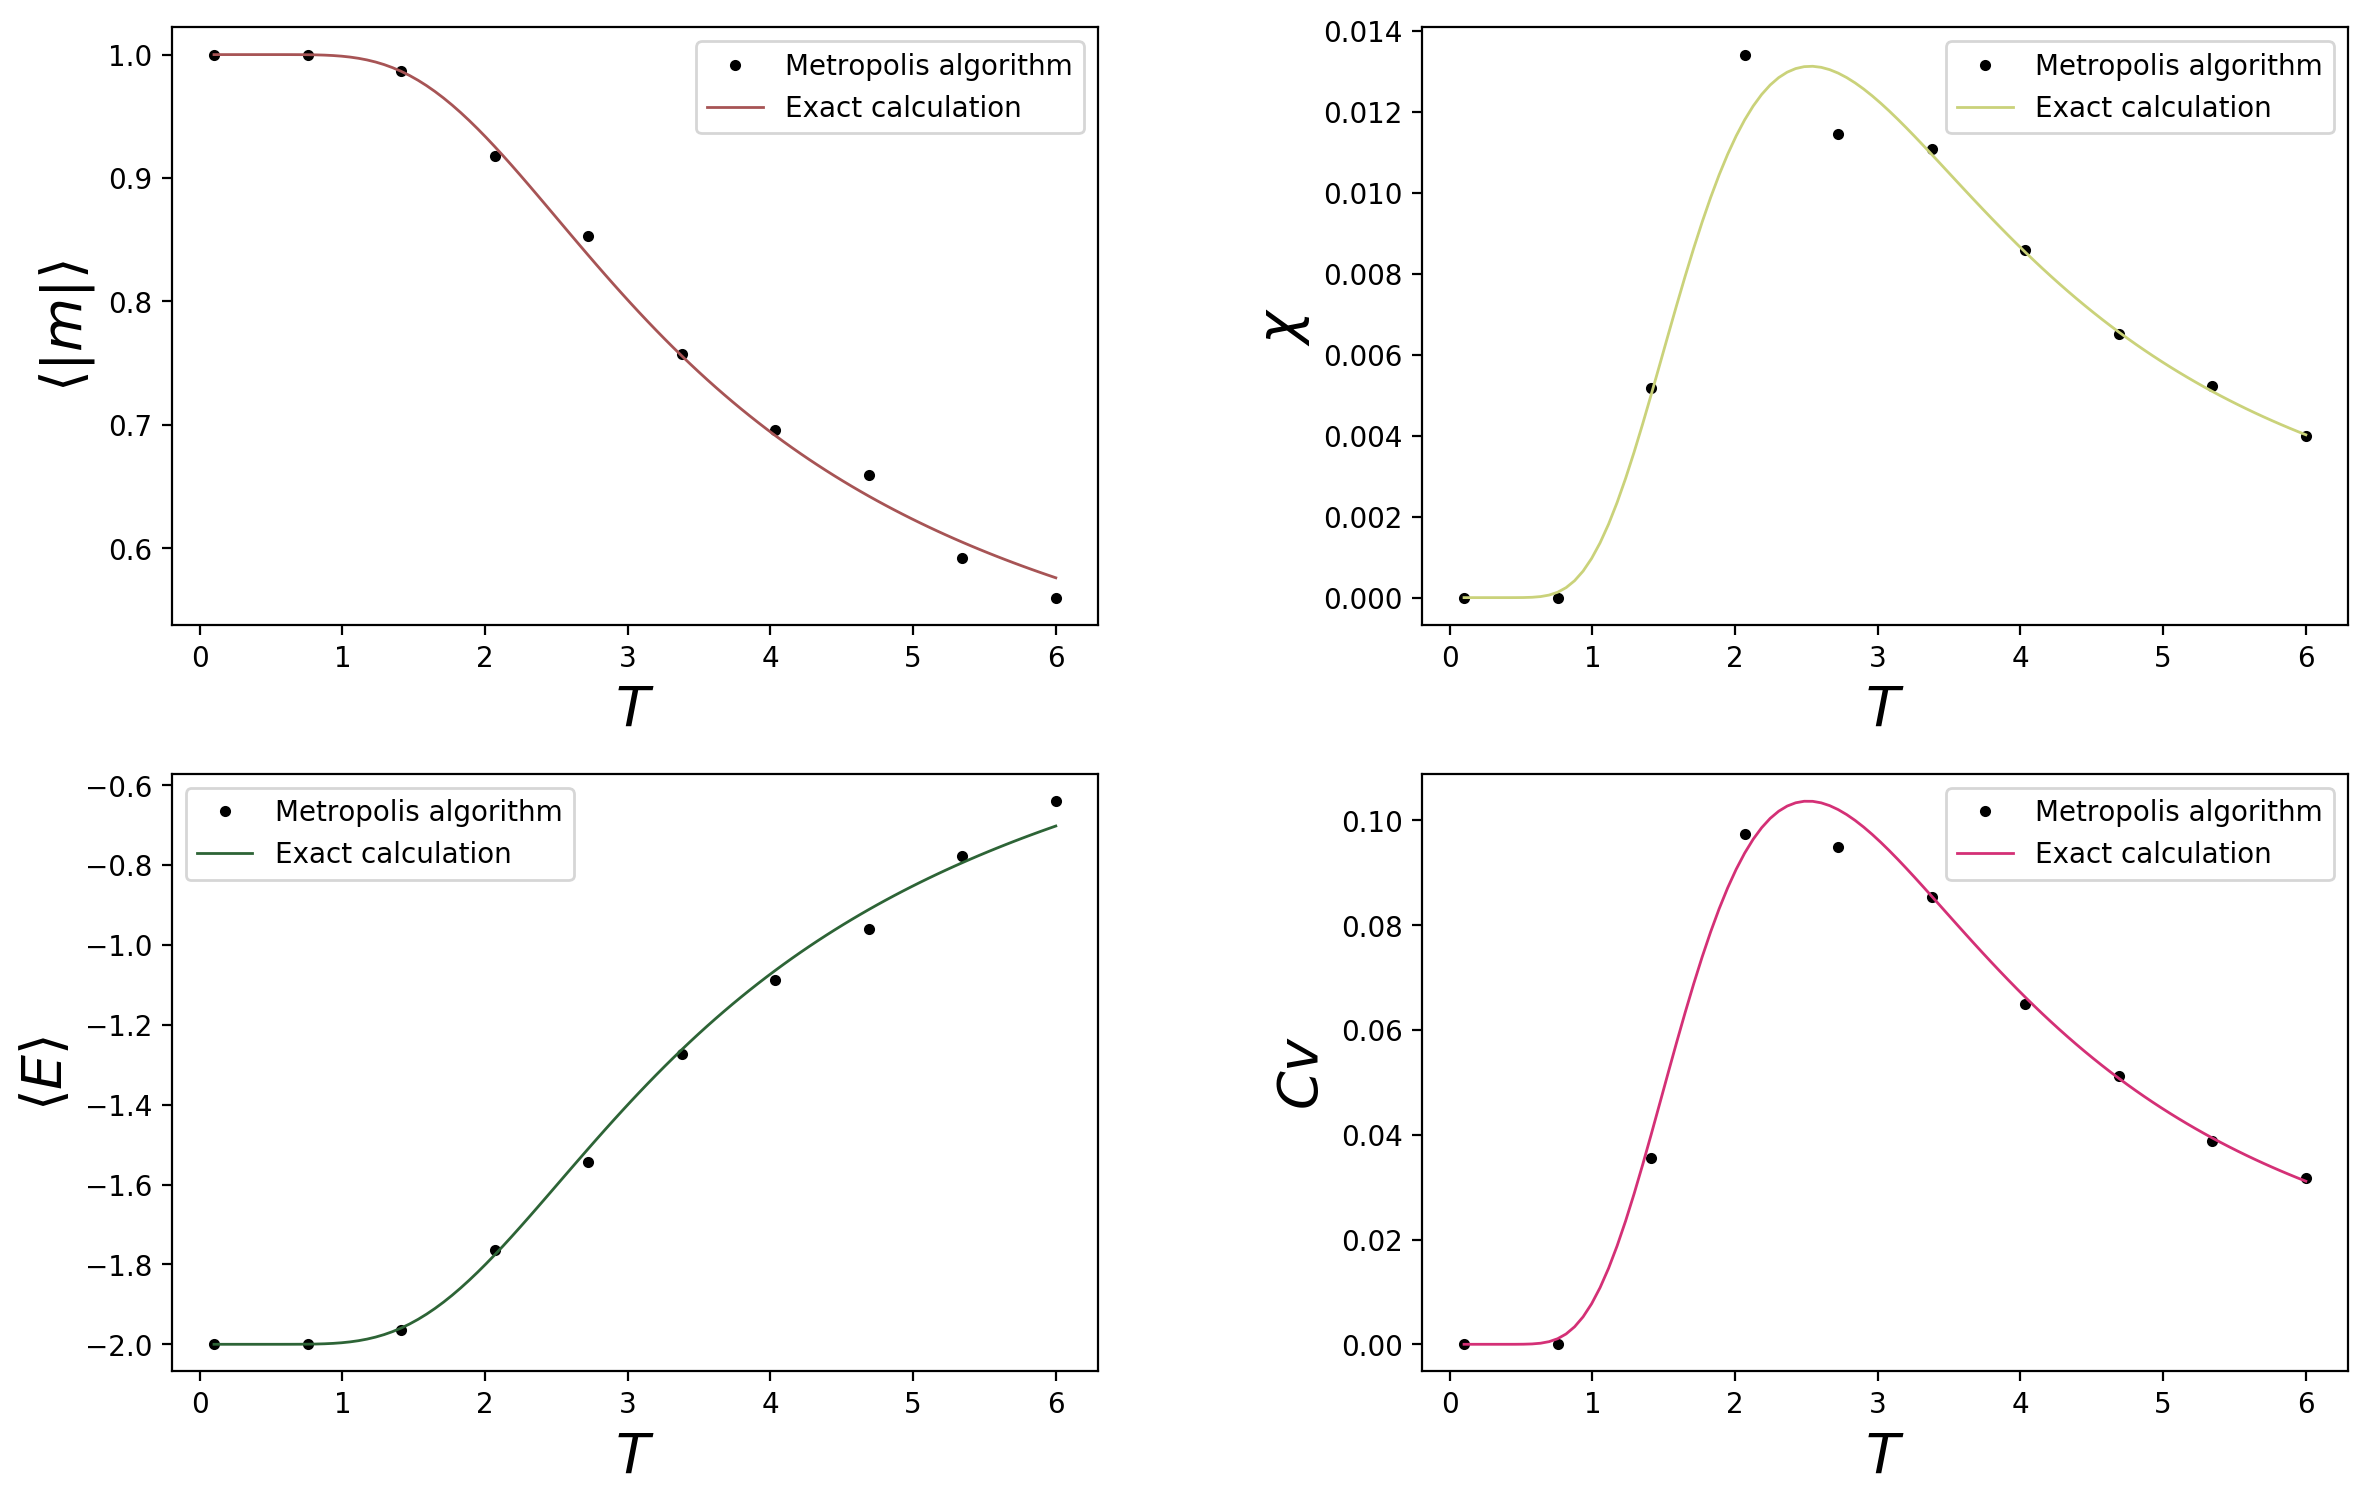

In [42]:
def compare(L):
    N=L*L
    list_T=np.linspace( 6,0.1,10)
    sweeps=5000
    flip=100
    list_M,list_chi,list_E,list_Cv = isingsweeps(list_T,sweeps,flip,L)
    T=np.linspace(0.1,6,100)
    list_M_exact,list_chi_exact,list_E_exact,list_Cv_exact=ising(T,L)#exculate calculation
    
    plt.figure(1,figsize=(12.8,8), dpi=200)
    #draw M 
    plt.subplot(221)
    line1,=pylab.plot(list_T,  list_M, 'k.',label="Metropolis algorithm")
    line2,=pylab.plot(T,list_M_exact, 'k-', lw=1,color=np.random.rand(3,1),label="Exact calculation")
    plt.xlabel('$T$', fontsize=20)
    plt.legend()
    plt.ylabel(r'$\langle |m|\rangle$', fontsize=20)
    
    #draw chi   
    plt.subplot(222)
    line1,=pylab.plot(list_T,  list_chi, 'k.',label="Metropolis algorithm")
    line2,=pylab.plot(T,list_chi_exact, 'k-', lw=1,color=np.random.rand(3,1),label="Exact calculation")
    plt.xlabel('$T$', fontsize=20)
    plt.legend()
    plt.ylabel(r'$ \chi$', fontsize=20)
    
    #draw E
    plt.subplot(223)
    line1,=pylab.plot(list_T,  list_E, 'k.',label="Metropolis algorithm")
    line2,=pylab.plot(T,list_E_exact, 'k-', lw=1,color=np.random.rand(3,1),label="Exact calculation")
    plt.xlabel('$T$', fontsize=20)
    plt.legend()
    plt.ylabel(r'$\langle E\rangle$', fontsize=20)
    #draw Cv
    plt.subplot(224)
    line1,=pylab.plot(list_T,  list_Cv, 'k.',label="Metropolis algorithm")
    line2,=pylab.plot(T,list_Cv_exact, 'k-', lw=1,color=np.random.rand(3,1),label="Exact calculation")
    plt.xlabel('$T$', fontsize=20)
    plt.legend()
    plt.ylabel(r'$ Cv$', fontsize=20)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()
compare(2)

### Correlation time

In [187]:
def cotime(T,L,sweeps):
    flip=1
    N=L*L
    list_M=[]
    list_E=[]
    list_Cv=[]
    list_chi=[]
    S = [np.random.choice([1, -1]) for k in list(range(N))]
    beta=1/T
    M_temp=[]
    E_temp=[]
    M_co=[]
    plt.figure(1,figsize=(12.10,2), dpi=200)
    time=list(range(sweeps))
    for k in time:
        M_temp,E_temp,S = ising_metropolis(T,L,flip,S)
        M_co.append(M_temp)
    plt.plot(time,M_co)
    plt.title(r'$T=%0.1fi,size=%i \times %i$'%(T,L,L))
    plt.xlabel('time')
    plt.ylabel(r'$|m|$')
    plt.show()
    return M_co

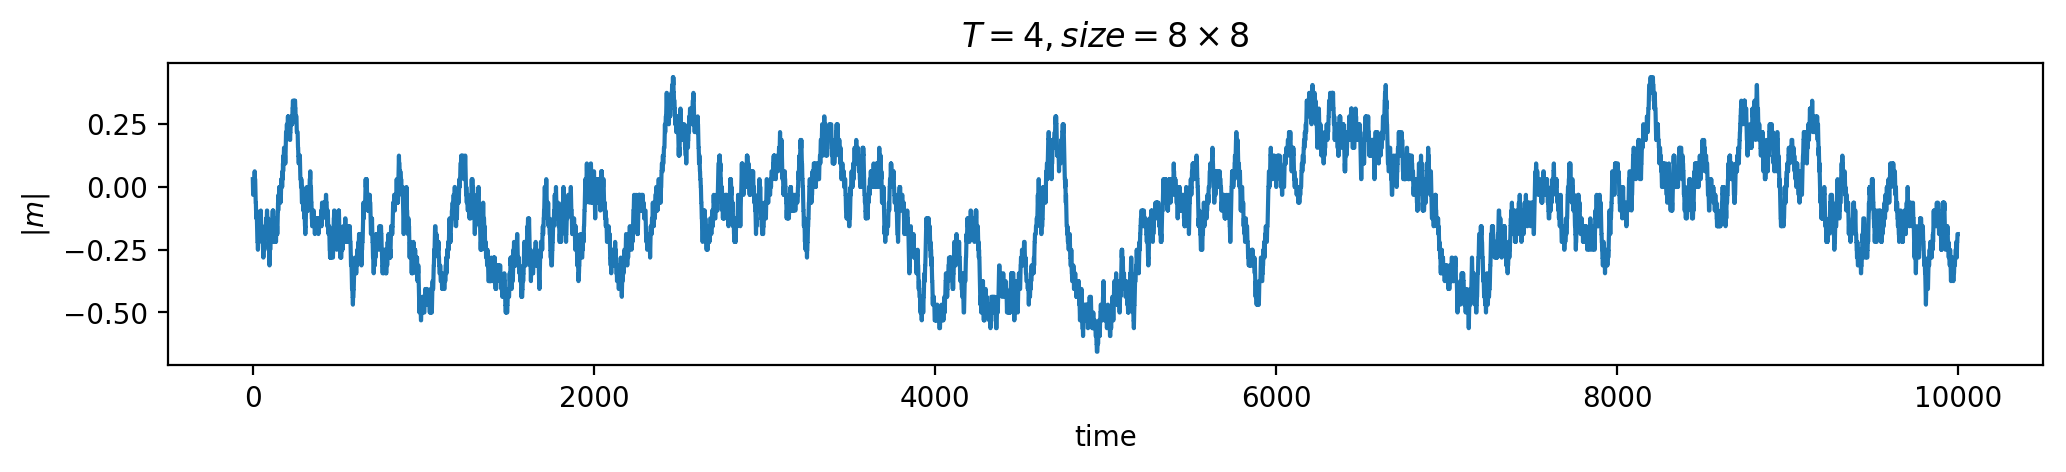

In [189]:
M=cotime(4.69185,8,10000)

### Appling Metropolis alofrithm to a larger system

Here, we applied Metropolis algorithm to a $8\times8$ grid.

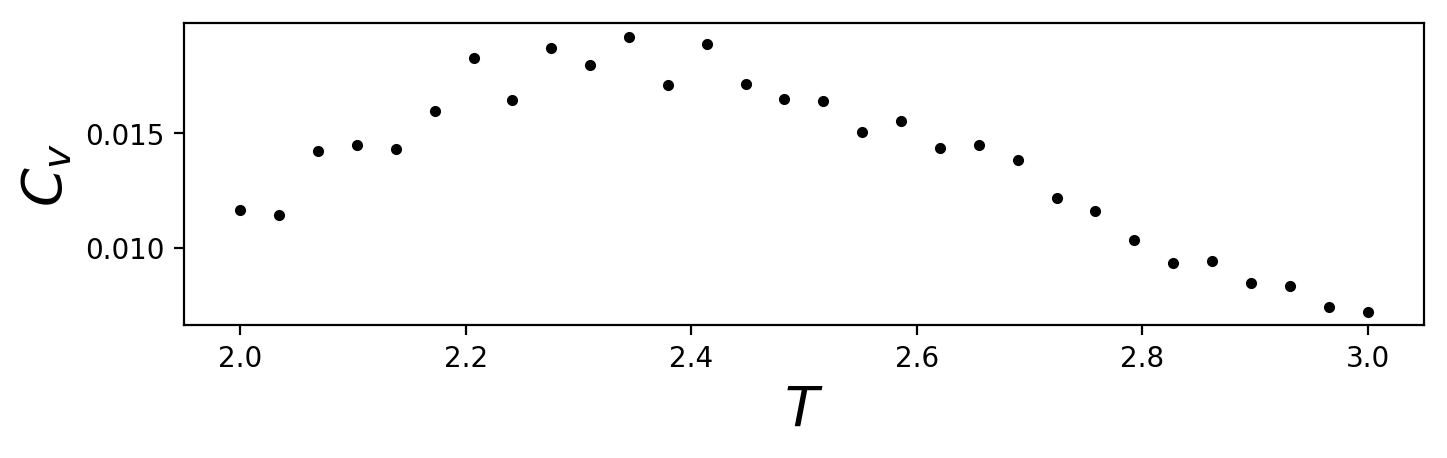

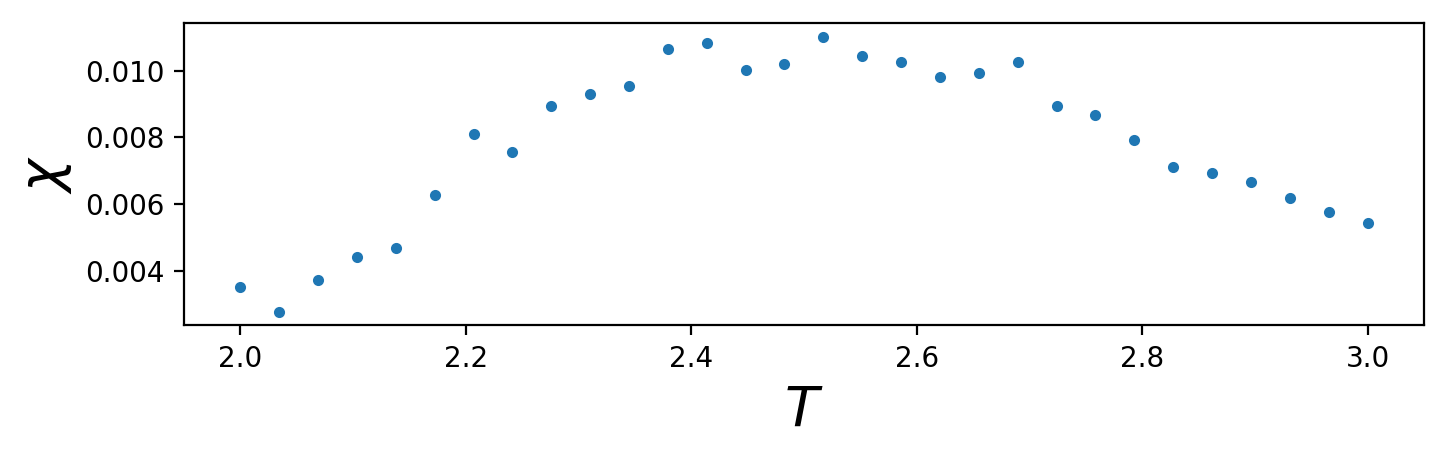

In [128]:
list_T=np.linspace(3,2,30)
sweeps=1000
flip=1000
L=8
list_M,list_chi,list_E,list_Cv = isingsweeps(list_T,sweeps,flip,L,1)
#specific capacity
plt.figure(1,figsize=(8,2), dpi=200)
plt.plot(list_T,list_Cv,'k.')
plt.xlabel('$T$', fontsize=20)
plt.ylabel('$C_v$', fontsize=20)
plt.show()
#chi
plt.figure(2,figsize=(8,2), dpi=200)
plt.plot(list_T,list_chi,'.')
plt.xlabel('$T$', fontsize=20)
plt.ylabel('$\chi$', fontsize=20)
plt.show()

### To obtain phase transition temperature


#### From susceptibility

#### From heat capacity

### Effect of changing the lattice size

## Ising spins in magnetic field
When the system is placed in external magetic filed. The Hamitonilian will have an additional part, which corresponds to the interaction between spins and the field:
\begin{equation}
E_{\{s_i\}}=E_{in}+E_{out}=\sum_{ij}J_{ij}s_is_j-H\sum_{i=1}^{N}s_i
\end{equation}
When we change $H$, the Hamitonlnian also changes. Hence the the Boltzmann factor $\exp(-\beta H)$ change. The system will reach to another euilibrium state.
Spins tends to align to magnetic field, while they also tens to align with each other. These two mechanism leads to magnetic hysteresis, which means the magnetisation does not only depend on external field, but also depend on how the field changed in the past.

Here, we use Metropoli algorithm to simulate this process.

In [261]:
def hysteresis(T):
    HFMAX=4
    steps=10
    HF_up=np.linspace(0,HFMAX,steps)
    HF_down=np.linspace(HFMAX,0,steps)
    HField=np.concatenate((HF_up,HF_down,-HF_up,-HF_down,HF_up,HF_down,-HF_up,-HF_down),axis=0)
    L=8
    N=L**2
    S = [np.random.choice([1, -1]) for k in list(range(N))]
    M_f=[]
    flip=400
    sweeps=200
    for hfield in HField:
        M_av=0
        for i in list(range(sweeps)):
            M_temp,E_temp,S = ising_metropolis(T,L,flip,S,hfield)
            M_av+=M_temp
        M_av=M_av/sweeps
        M_f.append(M_av)
    plt.plot(HField,M_f,'k.')
    plt.xlabel('H')
    plt.ylabel('m')
    plt.title(r'$T=%0.1f,size=%i\times %i$'%(T,L,L))

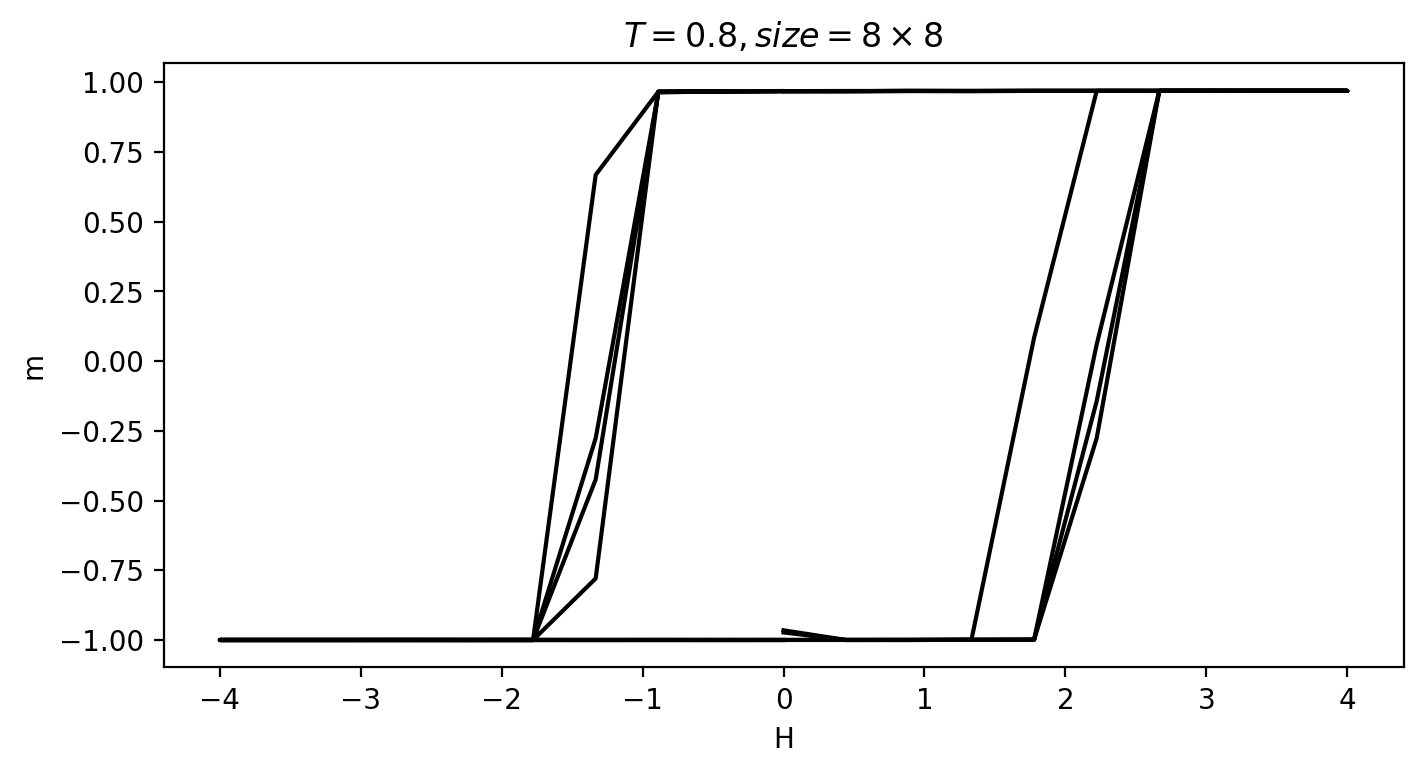

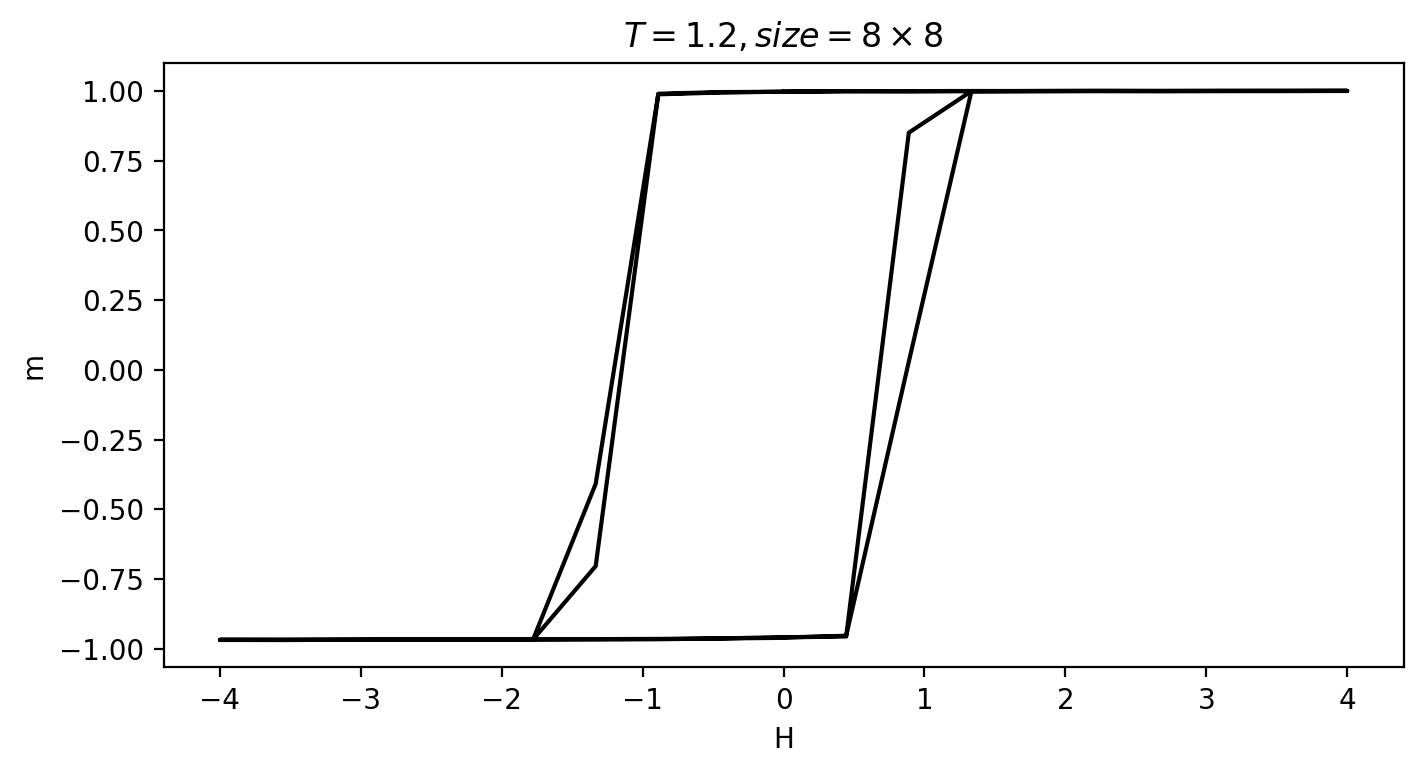

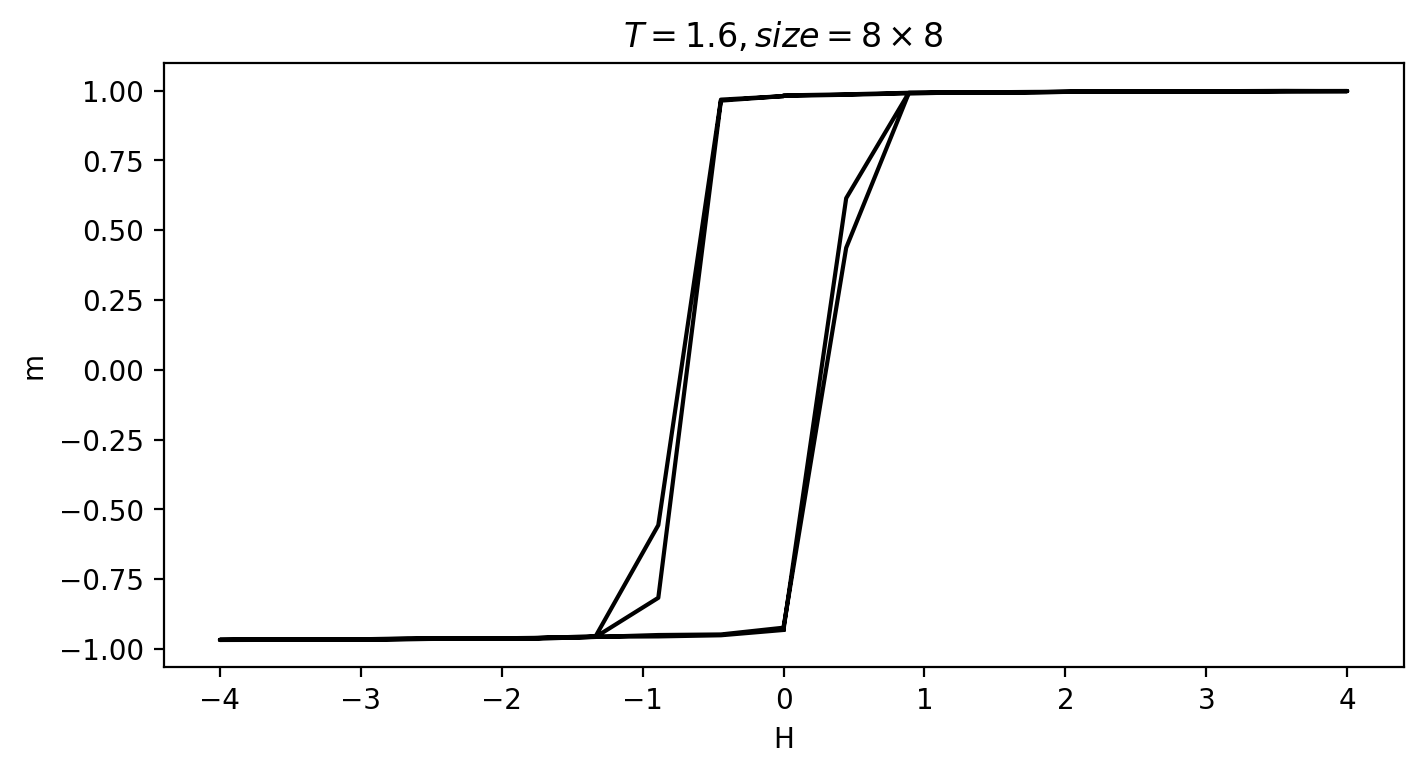

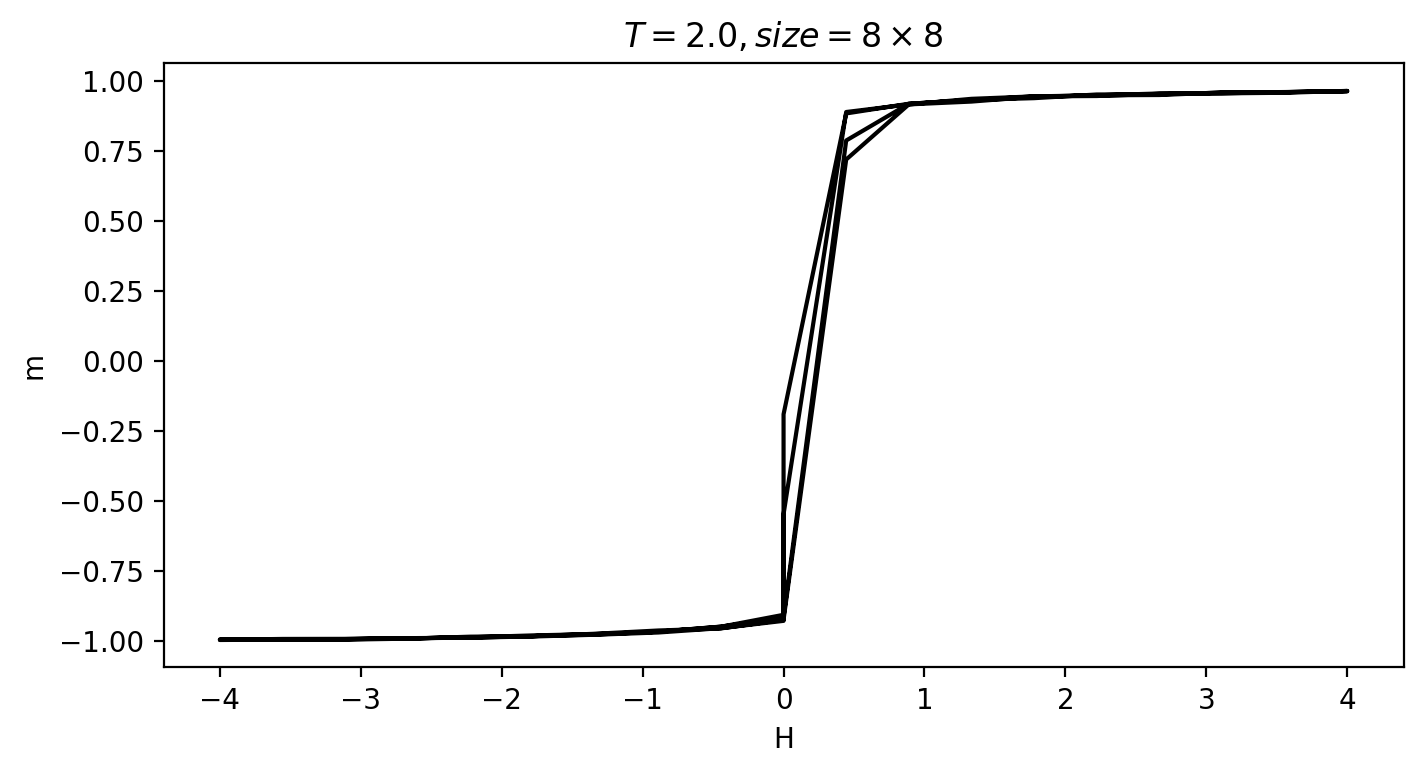

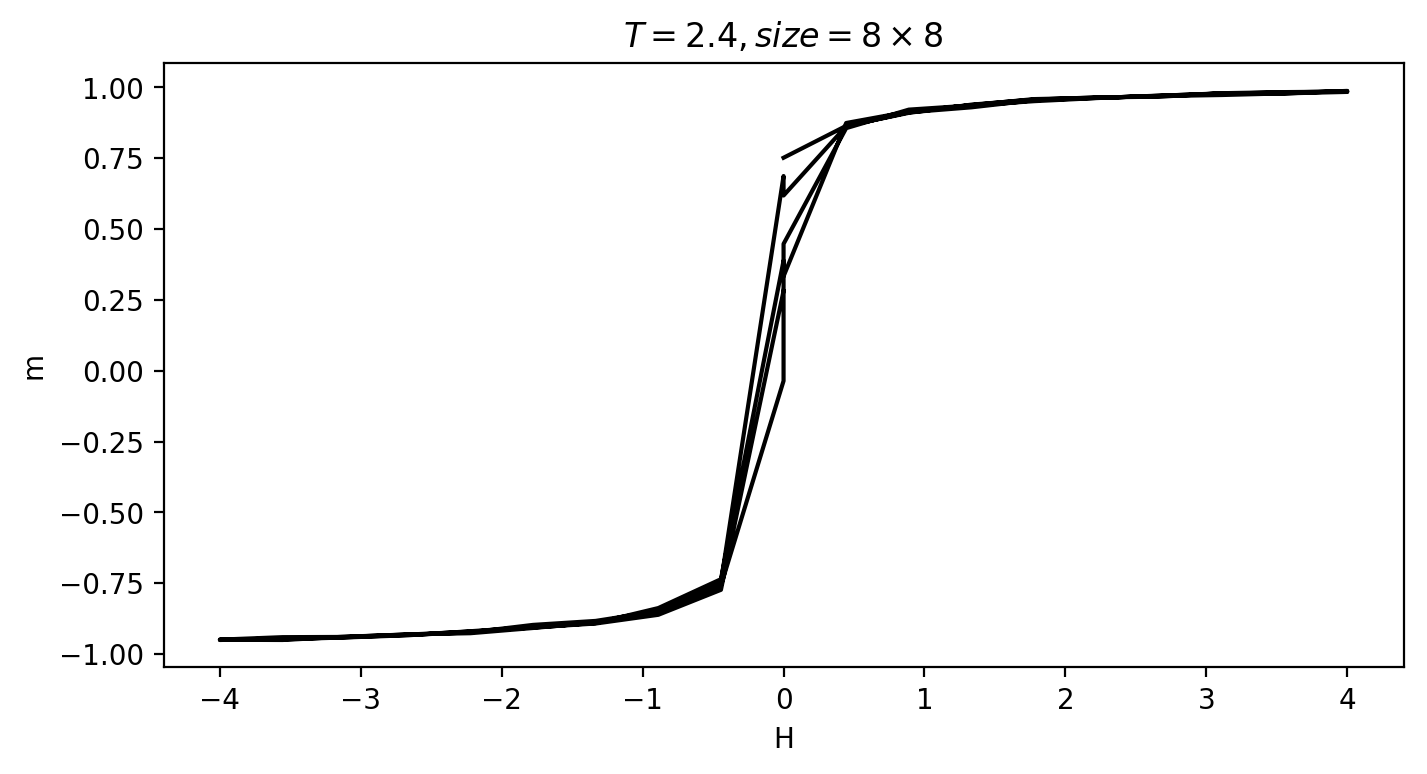

KeyboardInterrupt: 

In [259]:
T=list(np.linspace(0.8,3,9))
kk = 1
for t in T:
    plt.figure(k,figsize=(8,4), dpi=200)
    hysteresis(t)
    plt.show()
    kk += 1

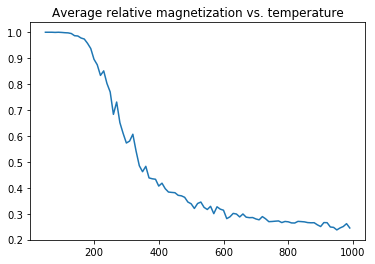

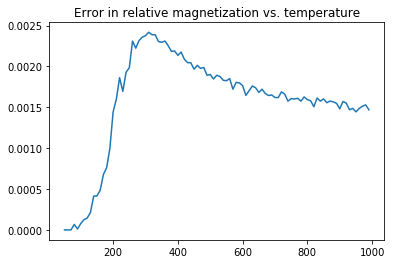

In [262]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from matplotlib import colors

grid_size = 4
k_b = 0.01
#T = 20

def energy(x, y):
    E = 0
    if x != grid_size - 1:
        E -= array[x + 1][y]*array[x][y]
    else:
        E -= array[0][y]*array[x][y]
    if x != 0:
        E -= array[x - 1][y]*array[x][y]
    else:
        E -= array[grid_size - 1][y]*array[x][y]
    if y != grid_size - 1:
        E -= array[x][y + 1]*array[x][y]
    else:
        E -= array[x][0]*array[x][y]
    if y != 0:
        E -= array[x][y - 1]*array[x][y]
    else:
        E -= array[x][grid_size - 1]*array[x][y]
    return E

def prob(e_i, e_f):
    p = math.exp((e_i - e_f)/(k_b * T))
    return p
    
def flip(s):
    if s == 1:
        return -1
    if s == -1:
        return 1

def final_energy(x, y, energy_i):
    energy_f = energy_i - 2*energy(x, y)
    if x != grid_size - 1:
        energy_f += 2*array[x + 1][y]*array[x][y]
    else:
        energy_f += 2*array[0][y]*array[x][y]
    if x != 0:
        energy_f += 2*array[x - 1][y]*array[x][y]
    else: 
        energy_f += 2*array[grid_size - 1][y]*array[x][y]
    if y != 0:
        energy_f += 2*array[x][y - 1]*array[x][y]
    else: 
        energy_f += 2*array[x][grid_size - 1]*array[x][y]
    if y != grid_size - 1:
        energy_f += 2*array[x][y + 1]*array[x][y]
    else: 
        energy_f += 2*array[x][0]*array[x][y]
    return energy_f
    
Mag = []
Mag_sq = []
T_values = []
for T in range(50, 1000, 10):
    array = []
    for i in range(grid_size):
        array.append([])
        for j in range(grid_size):
            array[i].append(random.choice([-1,1]))
    
    Energy_i = 0
    Magnetization = 0
    for i in range(grid_size):
        for j in range(grid_size):
            Energy_i += energy(i, j)
            Magnetization += array[i][j]
    
    Mag_T = []
    Mag_sq_T = []
    for k in range(1000*grid_size**2 + 1):
        x = random.randint(0, grid_size - 1)
        y = random.randint(0, grid_size - 1)
        Energy_f = final_energy(x, y, Energy_i)
        if prob(Energy_i/2, Energy_f/2) >= 1:
            array[x][y] = flip(array[x][y])
            Magnetization += 2*array[x][y]
            Energy_i = Energy_f
        else:
            if random.random() < prob(Energy_i/2, Energy_f/2):
                array[x][y] = flip(array[x][y])
                Magnetization += 2*array[x][y]
                Energy_i = Energy_f
        if k>10*grid_size**2:
            Mag_T.append(abs(Magnetization))
            Mag_sq_T.append(Magnetization**2)
        #if k%(2.5*grid_size**2) == 0:
            #plt.figure(k, figsize=(8, 8))
            #plt.pcolormesh(array, vmin = -1, vmax = 1, cmap = colors.ListedColormap(['r','b']))
            #plt.savefig("%sx%s\\%s\\%s.png" %(grid_size, grid_size, T, k))
            #plt.close()
    Mag.append(np.mean(Mag_T))
    Mag_sq.append(np.mean(Mag_sq_T))
    T_values.append(T)
    
Mag_error = []
for i in range(len(Mag)):
    Mag_error.append(math.sqrt((Mag_sq[i] - Mag[i]**2)/(len(Mag_T) - 1))/grid_size**2)
    Mag[i] /= grid_size**2

plt.figure(1)
plt.title("Average relative magnetization vs. temperature")
plt.plot(T_values, Mag)
plt.show()
plt.figure(2)
plt.title("Error in relative magnetization vs. temperature")
plt.plot(T_values, Mag_error)
plt.show()